<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/AI_CUOI_KY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Link Github: https://github.com/thanhphap059/NguyenThanhPhap19146230.git

# Nguyễn Thanh Pháp MSSV 19146230 
# Khai báo thư viện
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Chuyển đến thư mục có chứa hình ảnh thú cưng
%cd /content/drive/MyDrive/Colab Notebooks/THUCUNG

/content/drive/MyDrive/Colab Notebooks/THUCUNG


In [5]:
# Tạo ra class ImageDataGenerator 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/THUCUNG/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 995 images belonging to 8 classes.


In [7]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/THUCUNG/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 320 images belonging to 8 classes.


In [8]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Ca Betta': 0,
 'Ga Tre Canh': 1,
 'Heo': 2,
 'Nhen Tarantula': 3,
 'Rua': 4,
 'Tac Ke': 5,
 'Tho': 6,
 'Vet': 7}

In [9]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Ca Betta': 0,
 'Ga Tre Canh': 1,
 'Heo': 2,
 'Nhen Tarantula': 3,
 'Rua': 4,
 'Tac Ke': 5,
 'Tho': 6,
 'Vet': 7}

In [10]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
32/32 [==============================] - 336s 10s/step - loss: 2.1685 - accuracy: 0.1809 - val_loss: 1.9298 - val_accuracy: 0.2156
Epoch 2/500
32/32 [==============================] - 20s 638ms/step - loss: 1.9258 - accuracy: 0.2302 - val_loss: 1.8470 - val_accuracy: 0.2406
Epoch 3/500
32/32 [==============================] - 21s 643ms/step - loss: 1.8770 - accuracy: 0.2623 - val_loss: 1.8102 - val_accuracy: 0.2688
Epoch 4/500
32/32 [==============================] - 20s 633ms/step - loss: 1.8157 - accuracy: 0.2774 - val_loss: 1.7923 - val_accuracy: 0.3187
Epoch 5/500
32/32 [==============================] - 20s 637ms/step - loss: 1.7937 - accuracy: 0.2844 - val_loss: 1.7126 - val_accuracy: 0.3406
Epoch 6/500
32/32 [==============================] - 20s 642ms/step - loss: 1.6986 - accuracy: 0.3447 - val_loss: 1.7188 - val_accuracy: 0.3531
Epoch 7/500
32/32 [==============================] - 20s 637ms/step - loss: 1.7044 - accuracy: 0.3437 - val_loss: 1.9263 - val_accuracy: 

In [12]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06689542531967163
Train Accuracy 0.9829145669937134


<function matplotlib.pyplot.show>

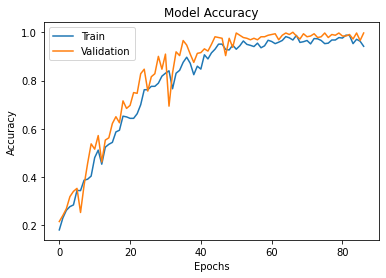

In [13]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [14]:
# Lưu lại
model.save("thucung.h5")

In [15]:
# Tải mô hình 
model_CNN=load_model('thucung.h5')

Tho


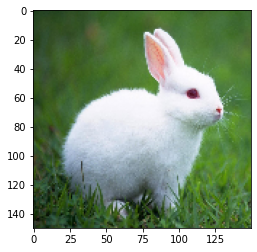

Tho


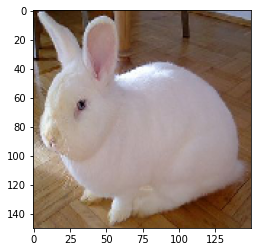

Vet


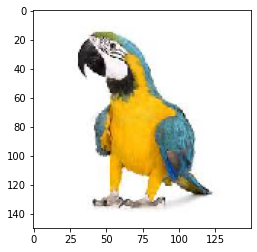

Rua


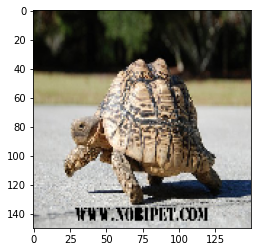

Cabetta


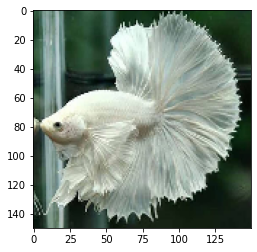

Cabetta


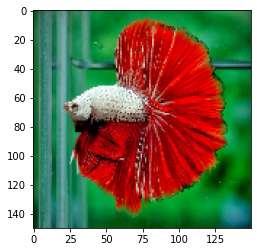

Cabetta


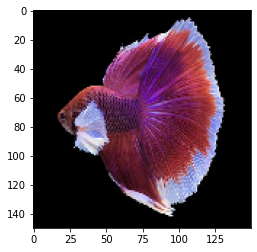

Tacke


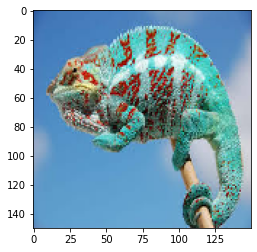

Tacke


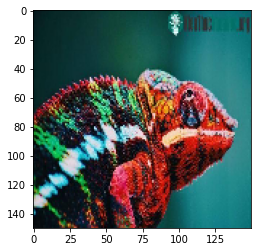

Tacke


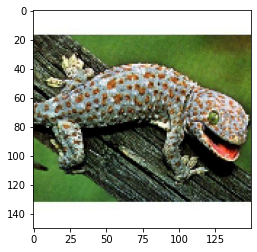

Tacke


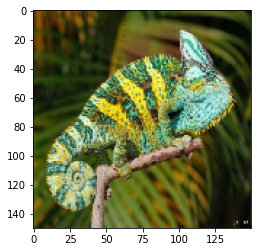

Heo


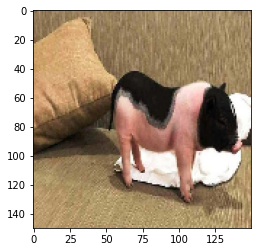

Heo


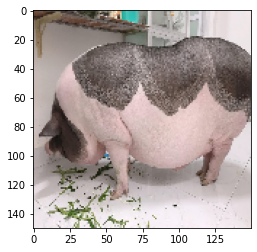

Heo


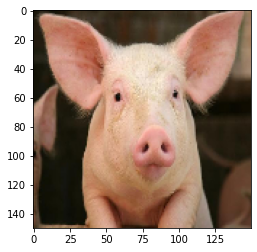

Heo


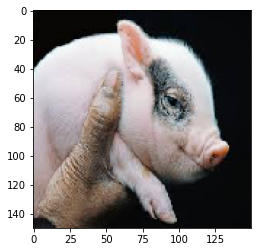

Gatrecanh


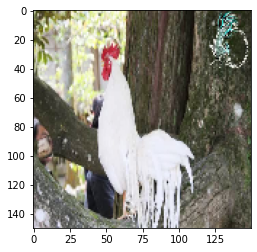

Gatrecanh


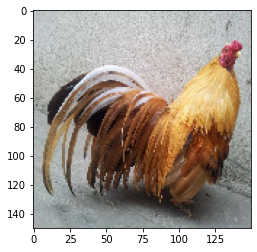

Gatrecanh


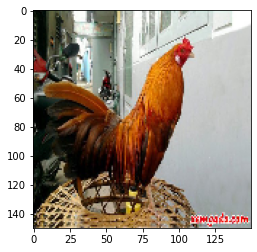

Gatrecanh


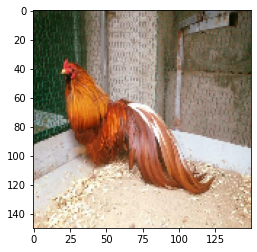

Vet


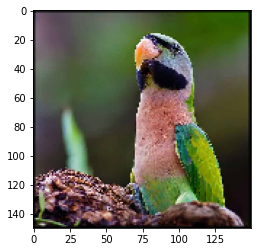

Vet


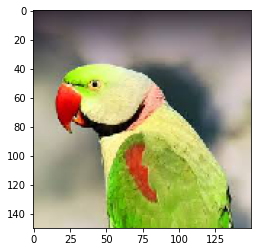

Vet


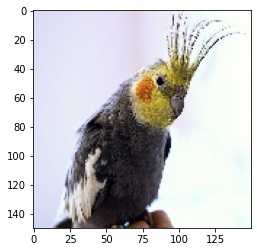

Tho


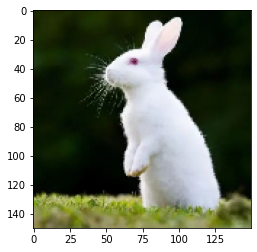

Tho


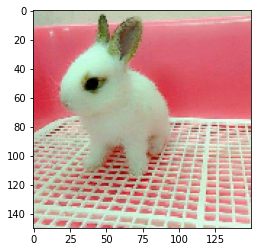

Tho


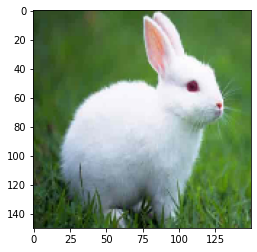

Cabetta


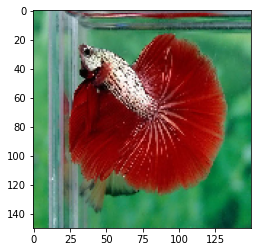

Nhentarantula


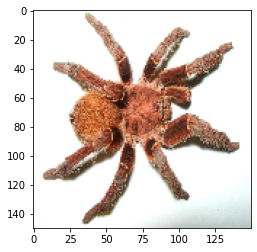

Nhentarantula


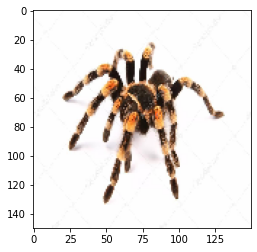

Nhentarantula


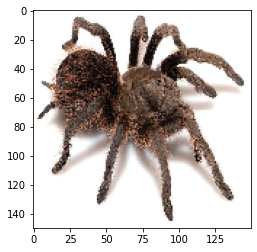

Rua


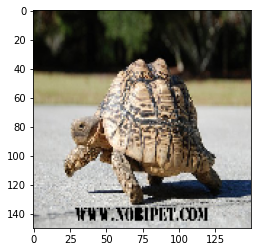

Rua


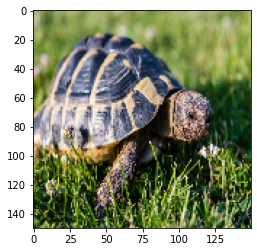

In [18]:
test="/content/drive/MyDrive/Colab Notebooks/THUCUNG/Test/Test1"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Cabetta'
  if round(result[0][1])==1:
    prediction='Gatrecanh'
  if round(result[0][2])==1:
    prediction='Heo'
  if round(result[0][3])==1:
    prediction='Nhentarantula'
  if round(result[0][4])==1:
    prediction='Rua'
  if round(result[0][5])==1:
    prediction='Tacke'
  if round(result[0][6])==1:
    prediction='Tho'
  if round(result[0][7])==1:
    prediction='Vet'
  print(prediction)
  plt.show()